# Analysis of Wine Data Set

For our analysis we will focus on the following research questions:

1. **Which variable is the most useful in determining the quality of a wine?**
2. **What properties are tied closest to a wine having a high alcohol percentage?**

We will look at these research questions with the red and white wine data sets separately and then draw overall conclusions.


In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

import sys, os
sys.path.insert(0, os.path.abspath('..'))
from scripts.project_functions import *

## Red Wine Data Set

In [4]:
red_wine_df = load_and_process("../../data/raw/winequality-red.csv", ";")
red_wine_df.head()

,fa,va,ca,rs,chlorides,fsd,tsd,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5


First let's see which variables are correlated to give us insight into the possible relationships between variables.

<AxesSubplot:>

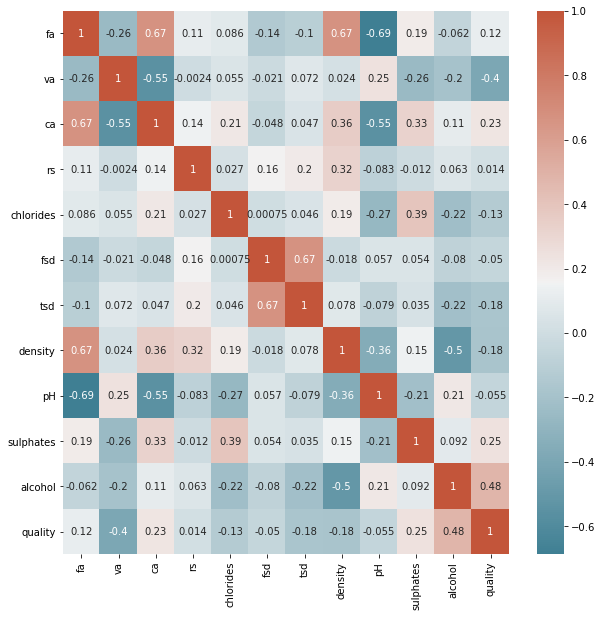

In [5]:
corr = red_wine_df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, 
            xticklabels=corr.columns, 
            yticklabels=corr.columns, 
            annot=True, 
            cmap=sns.diverging_palette(220, 20, as_cmap=True))

The strongest correlations are: citric acid and fixed acidity; density and fixed acidity; pH and fixed acidity; citric acid and volatile acidity; pH and citric acid; total sulfur dioxide and fixed sulfur dioxide; alcohol and density; volatile acidity and quality; and quality and alcohol. Of these we are most interested in the relationships with quality or alcohol. 

#### Question 1: Which variable is the most useful in determining the quality of a red wine?

We will look at the quality variable plotted against the characteristics found to have potential relationships in the correlation plot.

Text(0, 0.5, 'Volatile Acidity ($g/dm^3$)')

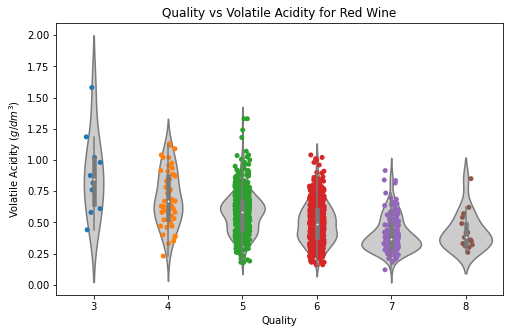

In [26]:
plt.figure(figsize=(8,5))

sns.violinplot(x="quality", y="va", data=red_wine_df, color="0.8")
sns.stripplot(x='quality', y='va', data=red_wine_df, jitter=True, zorder=1)

plt.title("Quality vs Volatile Acidity for Red Wine")
plt.xlabel("Quality")
plt.ylabel("Volatile Acidity ($g/dm^3$)")

So red wine with a quality of 3 has the highest volatile acidity. The *mean volatile acidity decreases as the quality of the red wine increases*.

Text(0, 0.5, 'Alcohol (vol. %)')

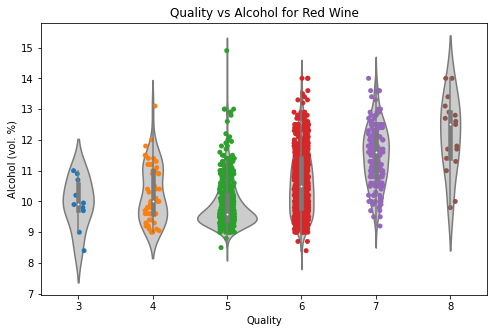

In [7]:
plt.figure(figsize=(8,5))

sns.violinplot(x="quality", y="alcohol", data=red_wine_df, color="0.8")
sns.stripplot(x='quality', y='alcohol', data=red_wine_df, jitter=True, zorder=1)

plt.title("Quality vs Alcohol for Red Wine")
plt.xlabel("Quality")
plt.ylabel("Alcohol (vol. %)")

This relationship looks a bit more distinct in this plot, however note that the white dot in the center of each distribution, which represents the mean, is not strictly increasing. It fluctuates between 9 and 10 for red wines with quality 3-5, and then for red wines with quality 6+ the *higher the alcohol percentage the higher the quality of red wine*. The distribution of each strip is also quite different. The highest quality red wine has an almost uniform distribution, whereas red wine with a quality of 5 has a distinct peak around it's mean. 

Text(0, 0.5, 'Chlorides ($g/dm^3$)')

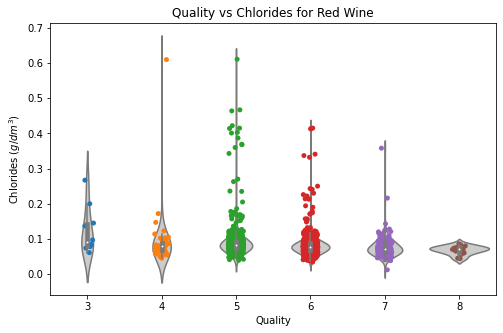

In [25]:
plt.figure(figsize=(8,5))

sns.violinplot(x="quality", y="chlorides", data=red_wine_df, color="0.8")
sns.stripplot(x='quality', y='chlorides', data=red_wine_df, jitter=True, zorder=1)

plt.title("Quality vs Chlorides for Red Wine")
plt.xlabel("Quality")
plt.ylabel("Chlorides ($g/dm^3$)")

While chlorides and quality are only slightly negatively correlated (-0.13), the *highest quality red wines all have a very low amount of chlorides*. The distributions of the red wines with a quality of 5 and above seem to be similar, if you exclude the long tails. This makes it difficult to interpret the results, because there are more medium quality red wines in this data set, which could be why the medium quality red wines may have higher amounts of chlorides.

When talking about wine people generally think that sweeter wines are lower quality compared to dry wines. Let's see how residual sugar is related to quality.

Text(0, 0.5, 'Residual Sugar ($g/dm^3$)')

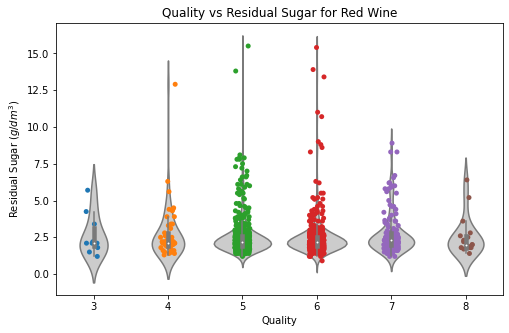

In [24]:
plt.figure(figsize=(8,5))

sns.violinplot(x="quality", y="rs", data=red_wine_df, color="0.8")
sns.stripplot(x='quality', y='rs', data=red_wine_df, jitter=True, zorder=1)

plt.title("Quality vs Residual Sugar for Red Wine")
plt.xlabel("Quality")
plt.ylabel("Residual Sugar ($g/dm^3$)")

Interestingly residual sugar does not appear to indicate anything about red wine quality. Though medium quality red wines appear to have higher amounts of residual sugar, the majority of the data points have quality between 5-6 so not much can be deduced from this plot.

Altogether, it appears that alcohol is the most indicative of a red wine's quality. However, since there are fewer red wines of higher qualities this could be a coincidence.

There could also be other underlying factors that contribute to a red wine having both a higher quality and a higher alcohol percentage which are not indicated in this data set.

#### Question 2: What properties are tied closest to a red wine having a high alcohol percentage?

From the previous section we already saw that higher quality red wines have a higher alcohol percentage. 

Now we'll explore the other pairs of variables that had higher correlations.

Text(27.0, 0.5, 'Chlorides ($g/dm^3$)')

<Figure size 576x576 with 0 Axes>

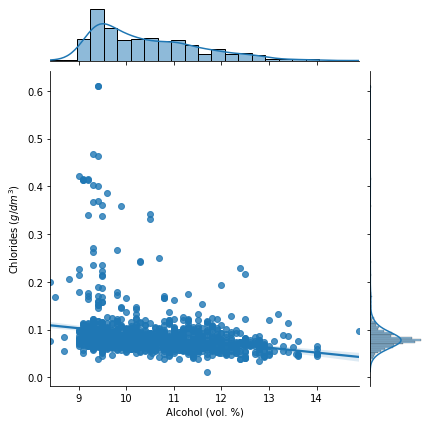

In [23]:
plt.figure(figsize=(8,8))

sns.jointplot(x="alcohol", y="chlorides", data=red_wine_df, kind='reg')
plt.xlabel("Alcohol (vol. %)")
plt.ylabel("Chlorides ($g/dm^3$)")

There is a slight negative relationship between chlorides and alcohol. However, the majority of the red wines in this data set have low amounts of chlorides. There are a few outliers who appear to be making this relationship more distinct than it may actually be.

Text(0.5, 32.99999999999995, 'Alcohol (vol. %)')

<Figure size 576x576 with 0 Axes>

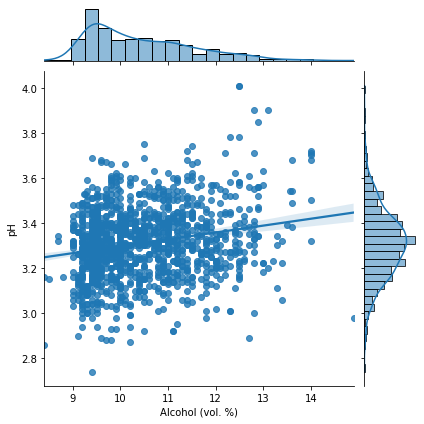

In [11]:
plt.figure(figsize=(8,8))

sns.jointplot(x="alcohol", y="pH", data=red_wine_df, kind='reg')
plt.xlabel("Alcohol (vol. %)")

This relationship is even less apparent than alcohol vs. chlorides.

Text(27.0, 0.5, 'Density ($g/cm^3$)')

<Figure size 576x576 with 0 Axes>

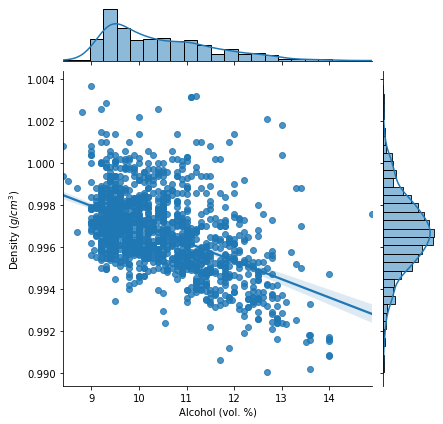

In [22]:
plt.figure(figsize=(8,8))

sns.jointplot(x="alcohol", y="density", data=red_wine_df, kind='reg')
plt.xlabel("Alcohol (vol. %)")
plt.ylabel("Density ($g/cm^3$)")

This is the strongest relationship seen between any of the variables and alcohol. We can see that when red wines are more dense they have less alcohol. 

So we can conclude that either density or quality are the characteristics most related to alcohol content in red wine.


Now that we've looked at the relationships between variables for red wine, let's see if there are any similarities or differences when considering the white wine data set.

## White Wine Data Set

In [13]:
white_wine_df = load_and_process("../../data/raw/winequality-white.csv", ";")
white_wine_df.head()

,fa,va,ca,rs,chlorides,fsd,tsd,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6


<AxesSubplot:>

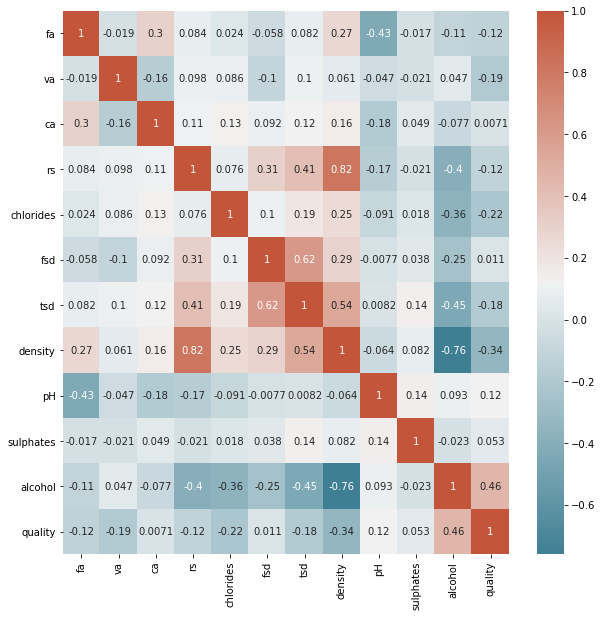

In [9]:
corr = white_wine_df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, 
            xticklabels=corr.columns, 
            yticklabels=corr.columns, 
            annot=True, 
            cmap=sns.diverging_palette(220, 20, as_cmap=True))

#### Question 1: Which variable is most useful in determining the quality of a white wine?

To explore this, we will look at some of the graphs in our white wine exploration on our data. 

Text(0, 0.5, 'Residual Sugar ($g/dm^3$)')

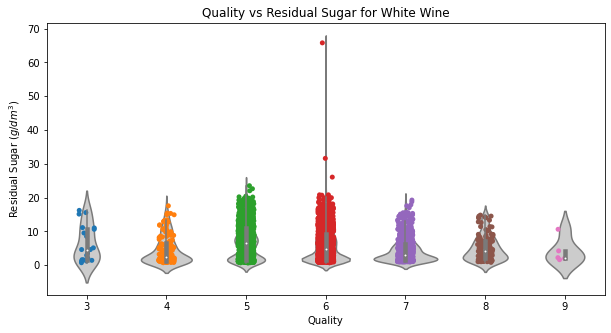

In [21]:
quality_group = white_wine_df.groupby('quality')
plt.figure(figsize=(10,5))

sns.violinplot(x="quality", y="rs", data=white_wine_df, color="0.8")
sns.stripplot(x='quality', y='rs', data=white_wine_df, jitter=True, zorder=1)

plt.title("Quality vs Residual Sugar for White Wine")
plt.xlabel("Quality")
plt.ylabel("Residual Sugar ($g/dm^3$)")

There doesn't seem to be much of a pattern or relationship arising from this plot, however looking at our numerical correlation plot it seems that alcohol has a strong correlation to quality! So lets check that out next!

Text(0, 0.5, 'Alcohol %')

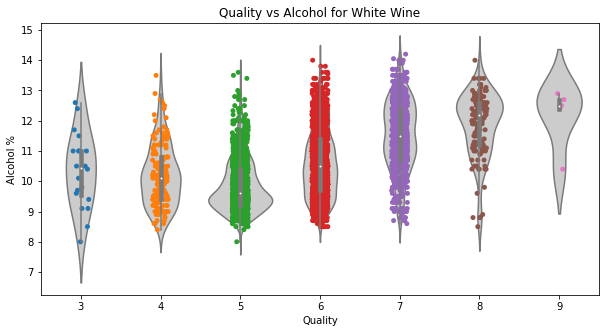

In [15]:
quality_group = white_wine_df.groupby('quality')
plt.figure(figsize=(10,5))

sns.violinplot(x="quality", y="alcohol", data=white_wine_df, color="0.8")
sns.stripplot(x='quality', y='alcohol', data=white_wine_df, jitter=True, zorder=1)

plt.title("Quality vs Alcohol for White Wine")
plt.xlabel("Quality")
plt.ylabel("Alcohol %")

So in conjunction with the numerical correlation plot this violin plot suggests that as the alcohol percentage increases, so does the quality, but it seems to be a "sweet spot" range that starts around 8.5% - 13.5%. Although it is important to remember correlation does not equal causation, by simply observing the results of the graphs, it suggests that the alcohol percentage could be a good indication of the quality of the wine. 

#### Question 2: What properties are tied closest to a white wine having a high alcohol percentage?
To observe this, we will refer to the numerical correlation plot in which volitile acid and pH seem to have the highest correlation to the alcohol %.

Text(27.0, 0.5, 'Volatile Acidity ($g/dm^3$)')

<Figure size 576x576 with 0 Axes>

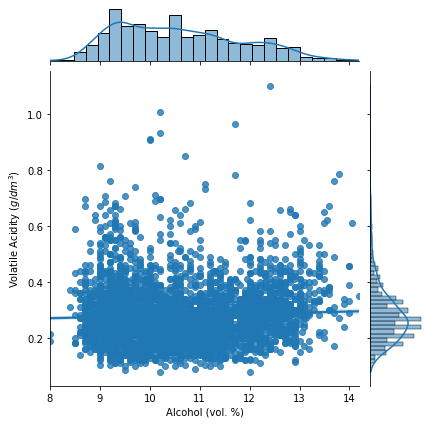

In [20]:
plt.figure(figsize=(8,8))

sns.jointplot(x="alcohol", y="va", data=white_wine_df, kind='reg')
plt.xlabel("Alcohol (vol. %)")
plt.ylabel("Volatile Acidity ($g/dm^3$)")

The trend line seems to be postively sloped, which is a good sign suggesting that Volatle acid maybe a key factor. Lets check pH next.

Text(0.5, 32.99999999999995, 'Alcohol (vol. %)')

<Figure size 576x576 with 0 Axes>

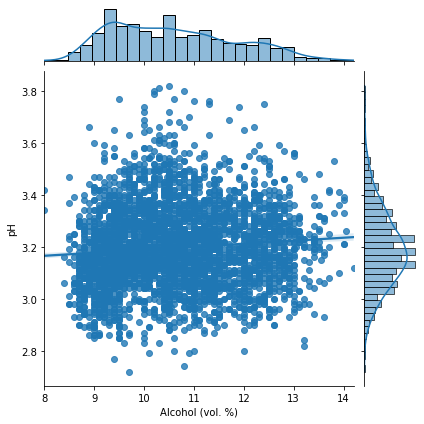

In [17]:
plt.figure(figsize=(8,8))

sns.jointplot(x="alcohol", y="pH", data=white_wine_df, kind='reg')
plt.xlabel("Alcohol (vol. %)")

Also positive, **this is good**! It makes sense that if the 'va' is correlated then pH should be too, since it is an acid afterall. Hard to draw the conclusion that volatile acid would be the only acid that affects the alcohol percentage. However, for white wine it seems to be the case that 'va' is affecting the pH which in turn affects the alcohol content. 

Text(27.0, 0.5, 'Density ($g/cm^3$)')

<Figure size 576x576 with 0 Axes>

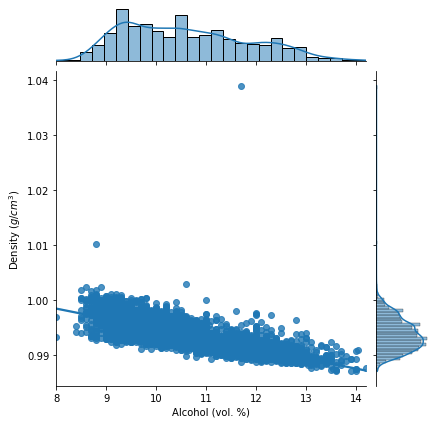

In [19]:
plt.figure(figsize=(8,8))

sns.jointplot(x="alcohol", y="density", data=white_wine_df, kind='reg')
plt.xlabel("Alcohol (vol. %)")
plt.ylabel("Density ($g/cm^3$)")

Here we see a more defined negative relationship. Lower densities seem to have a lower alcohol percentage. Although it needs to be noted that the majority of the data points lie within 0.01 $g/cm^3$ of each other, so there is not a large effect here.

---

## Conclusions for Both Types of Wine

When comparing the results from the red and white wine data sets, we can arrive at the following conclusions:

1. **Which variable is most useful in determining the quality of a wine?**
    - For both red and white wine **alcohol** seems to have the strongest relationship with wine quality.
    - We hypothesized that residual sugar would be negatively correlated with wine quality, but for both red and white wine residual sugar did not appear to have a strong relationship. However, maybe if the data was more evenly distributed across wines of varying quality a more distinct pattern could be seen. 
    - Overall since there are only a few data points representing high quality wine (7-9), it is difficult to come to conclusions about factors that influence wine quality. This may suggest that wine quality is not dependent on any of these physicochemical properties and is in fact dependent on some other factor. The wine quality is also a more subjective measurement compared to the others. If there were a way to determine wine quality objectively a more thorough analysis could be conducted that may have more reliable results.
2. **What properties are tied closest to a wine having a high alcohol percentage?**
    - We initially thought that perhaps residual sugar could have a role in how high the alcohol percentage was. However, in white wine we observe the high correlation in residual sugar and density and the negative correlation of residual sugar and alcohol content, as well as the very negative correlation between density and alcohol content, we can conclude that residual sugar and density are least likely to play a role in having a high alcohol percentage. In fact, wines that are *less* dense will have a higher alcohol percentage. 
    - In red wine, we can observe that there seems to be a correlation between sulphates and the alcohol content as well however we do not see the same relationship in white wines, this could suggest that it may not be a great indicator for wines in general for how much alcohol percentage there is. 
    - Upon inspection of both wines, it seems that there is *not* a particular type of acid that necessarily indicates a wine's alcohol %, but rather, the **pH** that would be the best property that is indicative of the alcohol content. 